In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

__Important to note! visit != population. A patient can visit twice__

In [2]:
import seaborn as sns 
sns.set(style="darkgrid")

In [3]:
df = pd.read_csv('../data/2017.csv')

In [7]:
len(df)

16709

In [17]:
#admit status (admitted to hospital or not)
df.ADMITHOS.value_counts() 

No     15048
Yes     1661
Name: ADMITHOS, dtype: int64

In [9]:
df.ADMIT.value_counts()

Not applicable                  15048
Other bed/unit                    842
Unknown (data not available)      265
Critical care unit                227
Operating room                    116
Mental health or detox unit        85
Stepdown unit                      81
Cardiac catheterization lab        30
Blank                              15
Name: ADMIT, dtype: int64

In [10]:
df.groupby('VDAYR').size() 

VDAYR
Friday       2265
Monday       2748
Saturday     2238
Sunday       2244
Thursday     2333
Tuesday      2510
Wednesday    2371
dtype: int64

In [7]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
df2.groupby('VDAYR')['PATWT'].sum().rename('Total').reset_index()

weighted_age = df2.groupby('VDAYR')['PATWT'].sum().rename('Total').reset_index()
weighted_age['Percent'] = weighted_age['Total'] *100 /weighted_age['Total'].sum()

In [136]:
weighted_age

,VDAYR,Total,Percent
0,Friday,18452400,13
1,Monday,22438034,16
2,Saturday,18776238,14
3,Sunday,18809938,14
4,Thursday,19862757,14
5,Tuesday,21004475,15
6,Wednesday,19633519,14


__Cat plot__

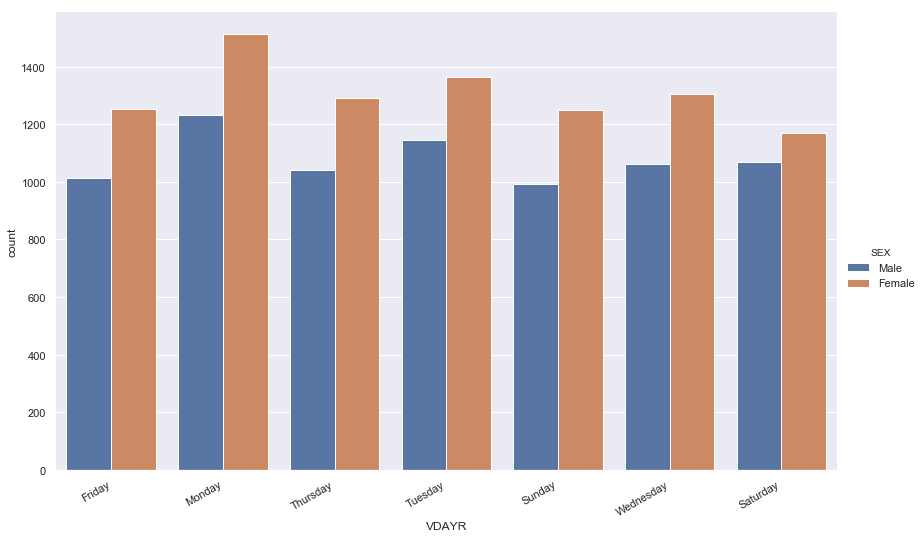

In [215]:
sns.set(rc={'figure.figsize':(55,55)})
ax = sns.catplot(x='VDAYR',kind='count',hue='SEX', data=df,orient="h"
                height=8.27, aspect=11.7/8.27)
ax.fig.autofmt_xdate()

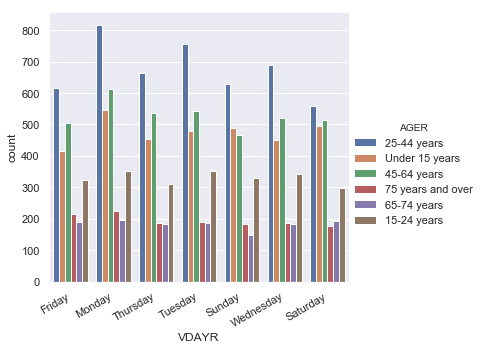

In [185]:
ax = sns.catplot(x='VDAYR',kind='count',hue='AGER', data=df,orient="h")
ax.fig.autofmt_xdate()

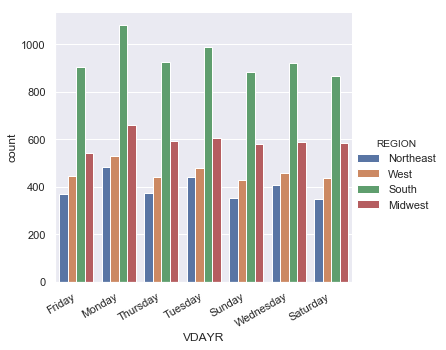

In [139]:
ax = sns.catplot(x='VDAYR',kind='count',hue='REGION', data=df,orient="h")
ax.fig.autofmt_xdate()

__Box plot__

<Figure size 3600x4320 with 0 Axes>

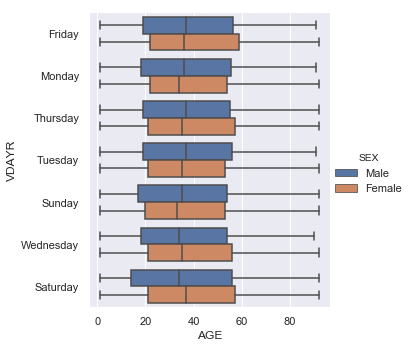

In [186]:
data= df.loc[df.AGE.str.isdigit()]
data['AGE']= data.AGE.astype(int)
sns.catplot(x="AGE",y="VDAYR",hue='SEX',kind='box',data= data) 

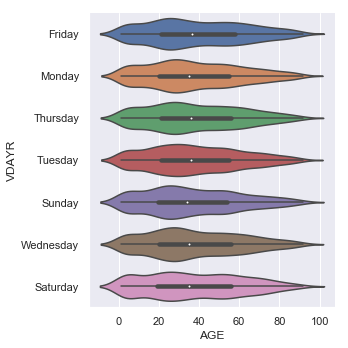

In [141]:
#KDE 
sns.catplot(x="AGE",y="VDAYR",kind='violin',data= data) 

In [120]:
temp = df
#data['TEMPF']= data.TEMPF.astype(int)

In [247]:
def custom_df(df,columns):
    df[[columns]] = pd.to_numeric(temp[[columns]], errors="coerce")
    df = temp[temp[columns].notna()]
    return df 


In [171]:
#converting the temperatures to numbers when possible and removing the ones that are not not numbers
temp['TEMPF']=pd.to_numeric(temp["TEMPF"], errors="coerce")
temp = temp[temp['TEMPF'].notna()]

In [219]:
temp.IMMEDR.unique() 

array(['Semi-urgent', 'Urgent', 'Emergent', 'Nonurgent', 'Immediate',
       'Unknown', 'Blank',
       'No triage for this visit but ESA does conduct triage',
       'Visit occurred in ESA that does not conduct nursing triage'],
      dtype=object)

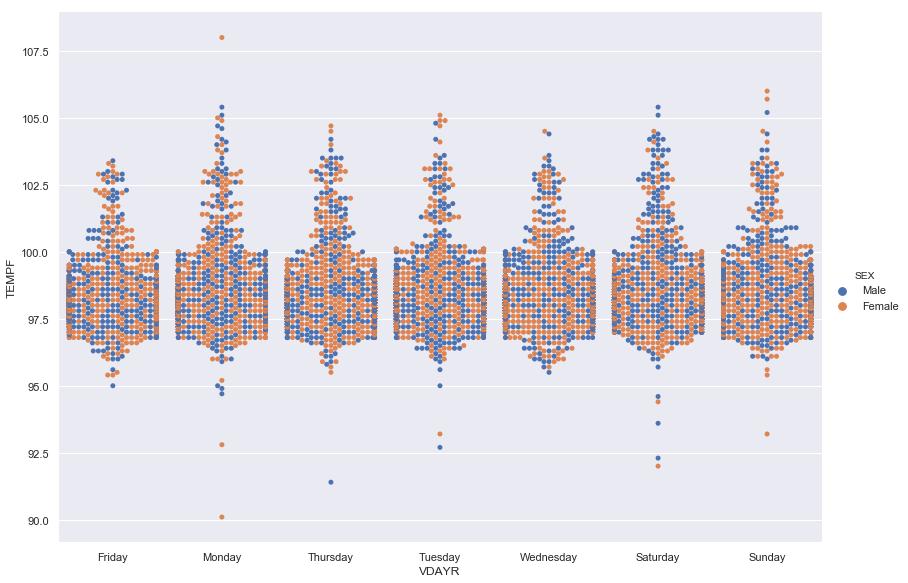

In [216]:
sns.catplot(x="VDAYR", y="TEMPF", hue="SEX", kind="swarm", data=temp,
            height=8.27, aspect=11.7/8.27);

__Working with Traige levels__

In [221]:
df.IMMEDR.value_counts() 

Urgent                                                        5759
Semi-urgent                                                   4100
Unknown                                                       3165
Emergent                                                      1539
Visit occurred in ESA that does not conduct nursing triage     696
Nonurgent                                                      667
Blank                                                          410
No triage for this visit but ESA does conduct triage           228
Immediate                                                      145
Name: IMMEDR, dtype: int64

In [231]:
triage_levels = ['Semi-urgent', 'Urgent', 'Emergent', 'Nonurgent', 'Immediate']
triage_levels_2 = ['Nonurgent', 'Immediate']

In [233]:
#getting just the values of triage_levels 


temp2 = temp[temp['IMMEDR'].isin(triage_levels_2)]

In [234]:
temp.IMMEDR.value_counts() 

Urgent         5548
Semi-urgent    3999
Emergent       1417
Nonurgent       649
Immediate       104
Name: IMMEDR, dtype: int64

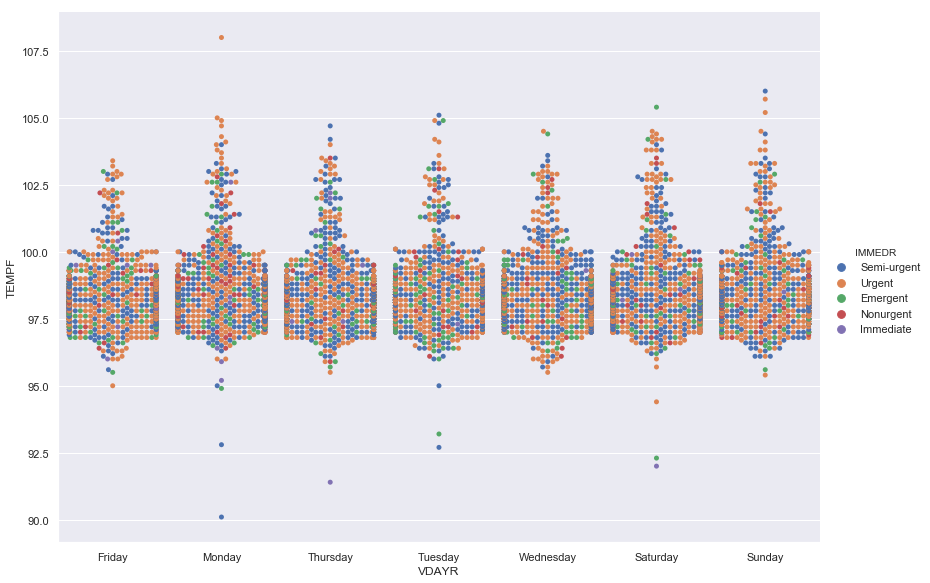

In [230]:
sns.catplot(x="VDAYR", y="TEMPF", hue="IMMEDR", kind="swarm", data=temp,
            height=8.27, aspect=11.7/8.27);

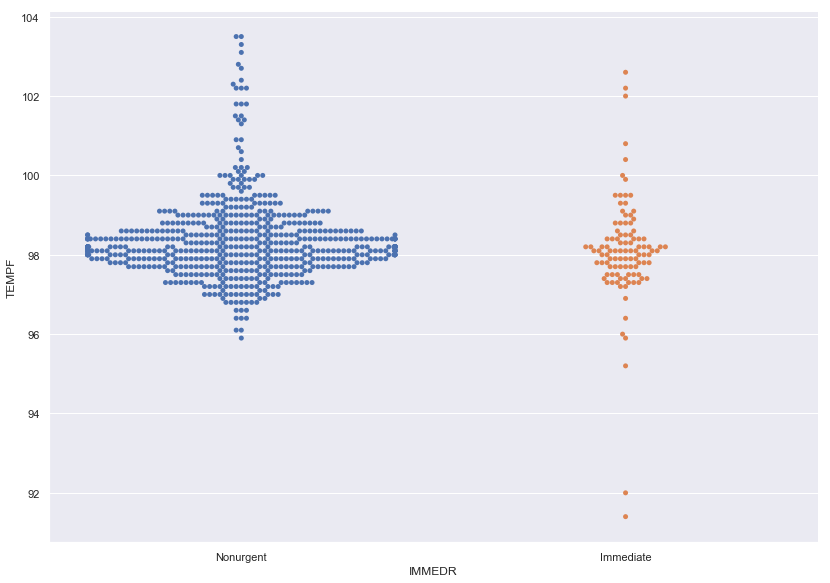

In [237]:
sns.catplot(y="TEMPF", x="IMMEDR", kind="swarm", data=temp2,
            height=8.27, aspect=11.7/8.27);

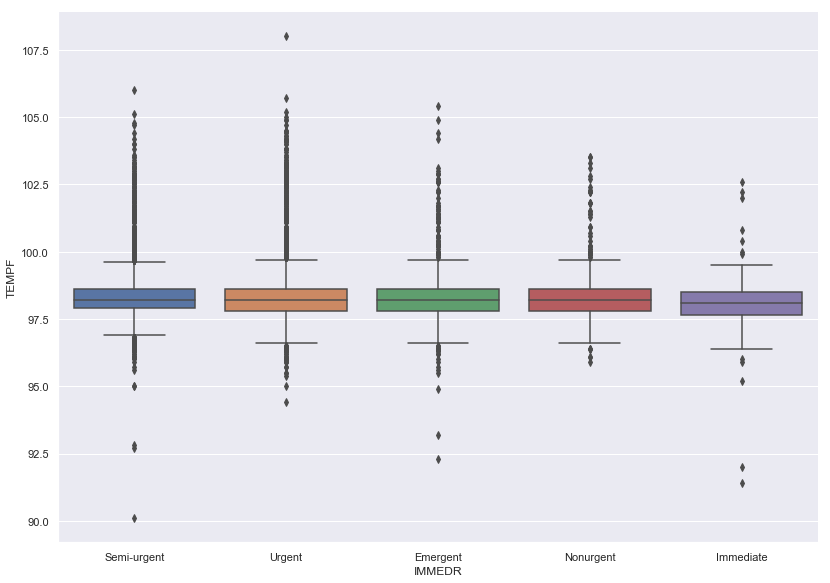

In [242]:
sns.catplot(y="TEMPF",x="IMMEDR",kind='box',data= temp,
           height=8.27, aspect=11.7/8.27) 









__PLOTS FOR TRIAGE__

In [12]:
plotdf = df 

In [13]:
triage_cols = ['TEMPF',
              'PULSE',
               'RESPR',
               'BPSYS',
               'BPDIAS',
              ]
#getting the numeric values of the columns 
plotdf[triage_cols] = plotdf[triage_cols].apply(pd.to_numeric, errors='coerce', axis=1)

#removing the columns with 'nan' values left after coerce 
for cols in triage_cols: 
    plotdf = plotdf[plotdf[cols].notna()]

#triage levels
triage_levels = ['Semi-urgent', 'Urgent', 'Emergent', 'Nonurgent', 'Immediate']

#getting just the triage_levels mentioned, not unnecessary ones
plotdf = plotdf[plotdf['IMMEDR'].isin(triage_levels)]


In [14]:
plotdf['AGE'] = plotdf['AGE'].apply(pd.to_numeric, errors='coerce')
plotdf = plotdf[plotdf['AGE'].notna()]

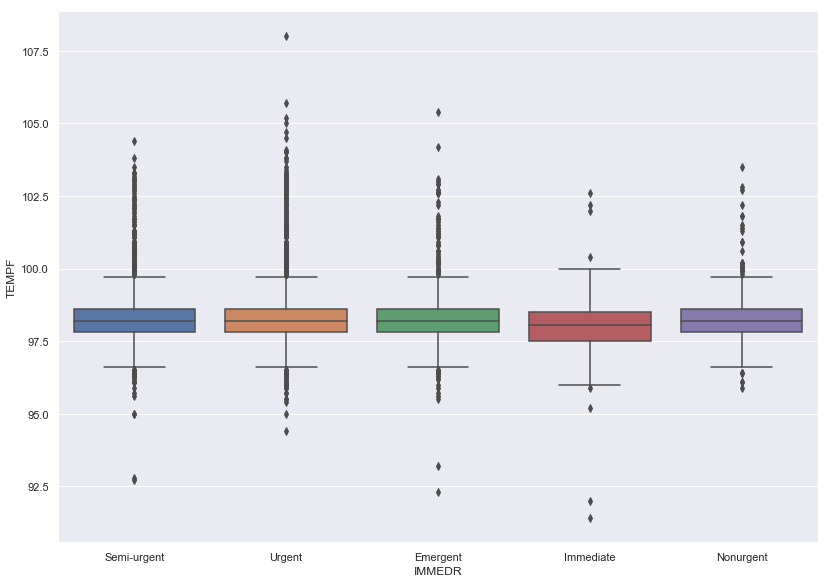

In [11]:
sns.catplot(y="TEMPF",x="IMMEDR",kind='box',data= plotdf,
           height=8.27, aspect=11.7/8.27) 

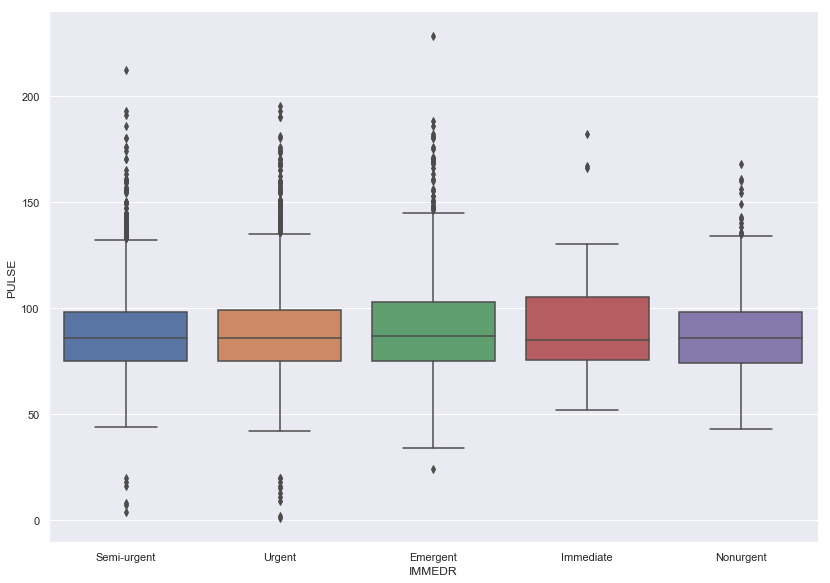

In [12]:
sns.catplot(y="PULSE",x="IMMEDR",kind='box',data= plotdf,
           height=8.27, aspect=11.7/8.27) 

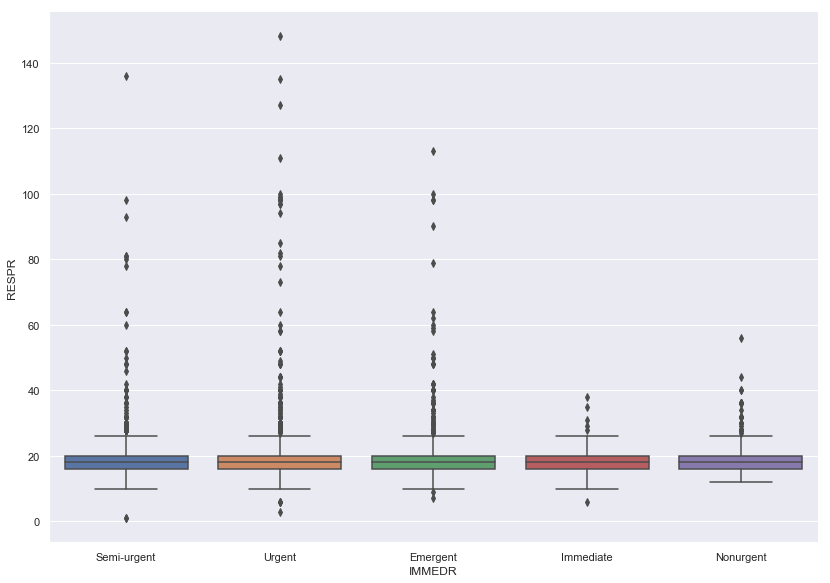

In [13]:
sns.catplot(y="RESPR",x="IMMEDR",kind='box',data= plotdf,
           height=8.27, aspect=11.7/8.27) 

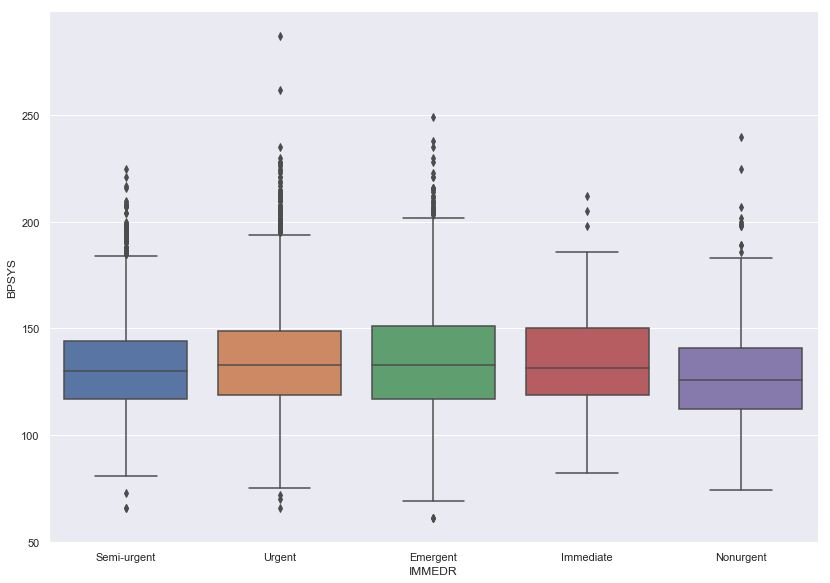

In [14]:
sns.catplot(y="BPSYS",x="IMMEDR",kind='box',data= plotdf,
           height=8.27, aspect=11.7/8.27) 

In [16]:
plotdf.ADMITHO

AttributeError: 'DataFrame' object has no attribute 'ADMITHO'

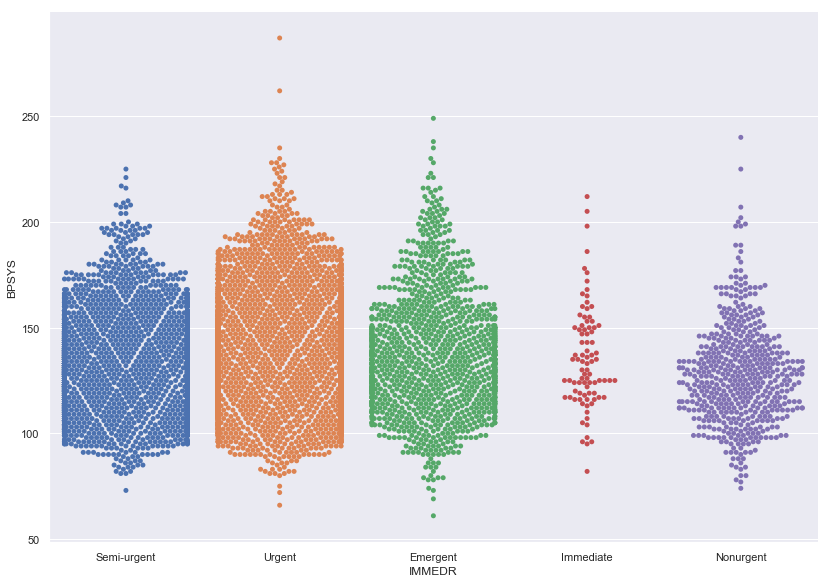

In [18]:
sns.catplot(y="BPSYS",x="IMMEDR",kind='swarm',
           data= plotdf,height=8.27, aspect=11.7/8.27)

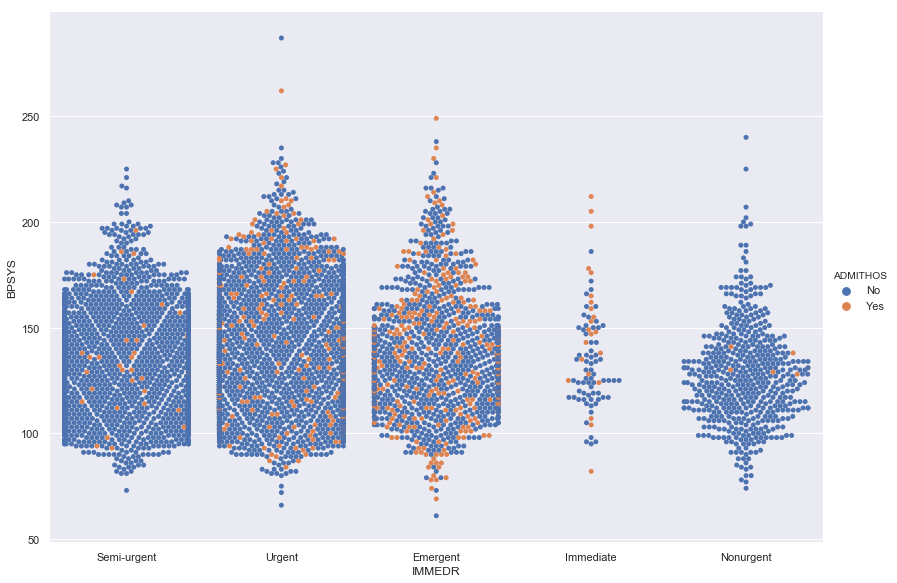

In [21]:
sns.catplot(y="BPSYS",x="IMMEDR",kind='swarm', hue = 'ADMITHOS',
           data= plotdf,height=8.27, aspect=11.7/8.27)

In [ ]:
sns.catplot(x="IMMEDR",kind='swarm', hue = 'ADMITHOS',
           data= plotdf,height=8.27, aspect=11.7/8.27)

In [ ]:
sns.countplot(x="IMMEDR", hue = 'ADMITHOS',
           data= plotdf,height=8.27, aspect=11.7/8.27)

In [19]:
plotdf.ADMITHOS

0         No
2         No
4         No
5         No
7         No
8         No
9         No
10        No
11        No
12        No
14       Yes
15        No
16        No
17        No
19        No
20       Yes
21        No
22        No
23        No
24        No
25        No
26        No
27        No
28        No
29        No
30        No
31        No
32        No
33        No
34        No
        ... 
16676     No
16677     No
16678     No
16679     No
16680     No
16681     No
16682    Yes
16683     No
16684     No
16685     No
16686    Yes
16687     No
16689    Yes
16690     No
16691    Yes
16692     No
16694     No
16695    Yes
16696     No
16697     No
16699     No
16700     No
16701     No
16702     No
16703     No
16704     No
16705     No
16706    Yes
16707     No
16708    Yes
Name: ADMITHOS, Length: 10279, dtype: object

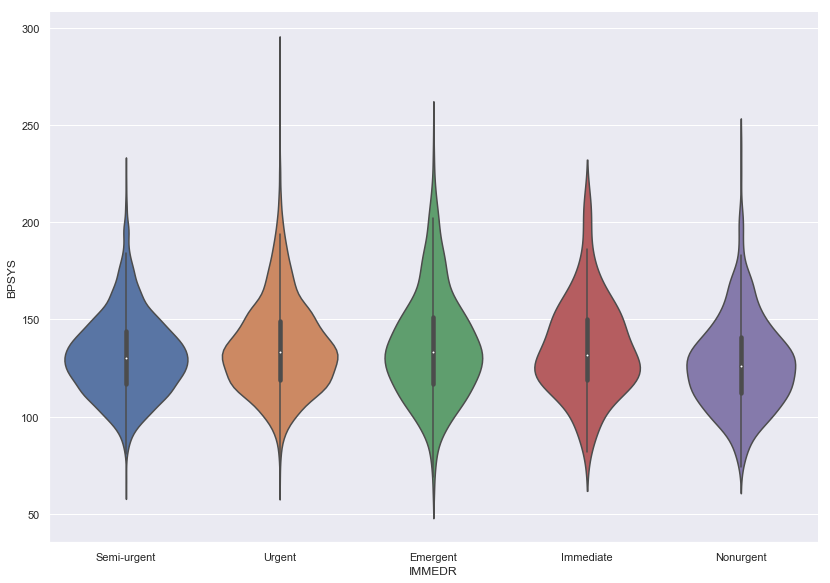

In [16]:
sns.catplot(y="BPSYS",x="IMMEDR",kind='violin',data= plotdf,
           height=8.27, aspect=11.7/8.27)

__DATE PLOT BY TRIAGE LEVEL__

In [6]:
#Processed dataset
df2 = pd.read_csv('../data/2017raw.csv')

In [141]:
df2 = df2[df2.ARRTIME != -9]



#getting just the triage_levels mentioned, not unnecessary ones
df2 = df2[df2['IMMEDR'].isin([1,2,3,4,5])]


In [74]:
#preprocessing date 
#df['ARRTIME'].loc[(df['ARRTIME'] == '12:00 Midnight')] = '12:00 a.m.'
plotdf['ARRTIME'].loc[(plotdf['ARRTIME'] == '12:00 Midnight')] = '12:00 a.m.'
plotdf['ARRTIME'].loc[(plotdf['ARRTIME'] == '12:00 noon')] = '12:00 p.m.'
dateplot = plotdf[plotdf.ARRTIME != 'Unknown']

In [76]:
dateplot.columns

Index(['VMONTH', 'VDAYR', 'ARRTIME', 'WAITTIME', 'BLANK1', 'AGE', 'AGER',
       'AGEDAYS', 'RESIDNCE', 'SEX',
       ...
       'RX30V3C1', 'RX30V3C2', 'RX30V3C3', 'RX30V3C4', 'SETTYPE', 'YEAR',
       'CSTRATM', 'CPSUM', 'PATWT', 'EDWT'],
      dtype='object', length=949)

In [109]:
#datetimeformat 
dateplot.ARRTIME = pd.to_datetime(plotdf.ARRTIME, errors='coerce')
#dateplot.ARRTIME = pd.to_datetime(temp.ARRTIME,format='%H:%M', errors='coerce')

In [116]:
#dateplot.ARRTIME = pd.to_datetime(dateplot.ARRTIME,format='%H:%M:%S', errors='coerce')

In [120]:
dateplot['time_arrival']=dateplot.ARRTIME.dt.hour

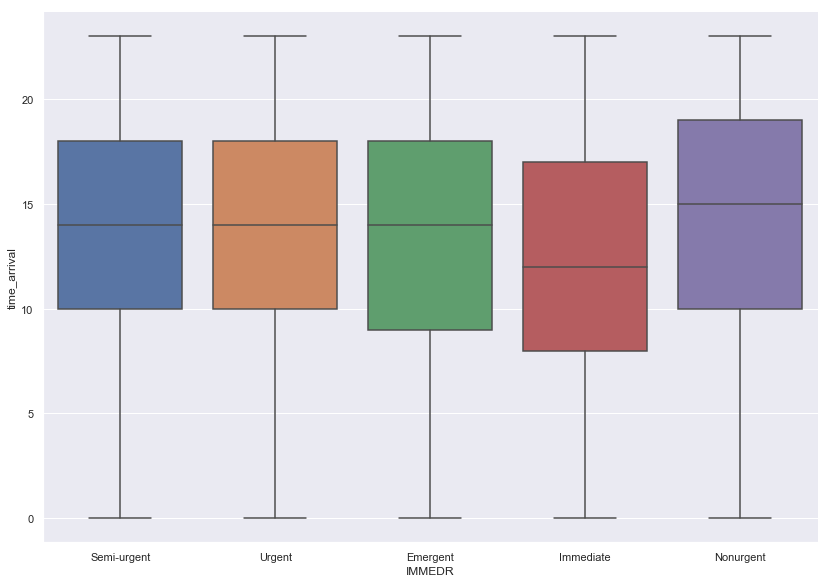

In [124]:
sns.catplot(y="time_arrival",x="IMMEDR",kind='box',data= dateplot,
           height=8.27, aspect=11.7/8.27)